<a href="https://colab.research.google.com/github/bdfd/Project_03-Social_Network_Ads/blob/main/Social_Network_Ad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social Media Ads Purchased Prediction

## Basic Approach

The Background Introduction  
Predict the user if they willing to puchase from the social network ads.   

The Approach  
1. Perform some quick EDA(Exploratory Data Analysis)
2. Use Scikit-Learn Regression Algorithm
3. Covert data into an array
4. Converting the target variable into Multivariate Linear Regression Algorithms

Prediction Used Model:
  *   1. Logistic Regression 
  *   2. Support Vector Machine Classifier
  *   3. Decision Tree Classifier 
  *   4. K Nearest Neighbors Classifier

Target Cluster Datasets is about a determine the social media ad purchase based on  following fields. 

Analyze information  
1 binary features: gender  
2 continuous features: Age, EstimatedSalary  
1 possible drop feature: UserID  
1 target variable: Purchased  


In [ ]:
!pip install table-nan-val
!pip install execdata

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import table_nan_val as tnv
import execdata as exe

In [ ]:
# Import necessary packages
import os 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Read the dataset
data_dir = 'https://raw.githubusercontent.com/bdfd/Portfolio_Project_13OP-Social_Network_Ads/main/dataset'
dataset = 'Social_Network_Ads.csv'
# Upload dataset into data frame
df = pd.read_csv(os.path.join(data_dir,dataset), encoding = 'utf-8')
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [ ]:
print(f'the dataset_1 size is {df.shape}')

the dataset_1 size is (400, 5)


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
# Find any missing or null value
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Your selected dataframe has 5 columns.
There are 0 columns that have missing values.


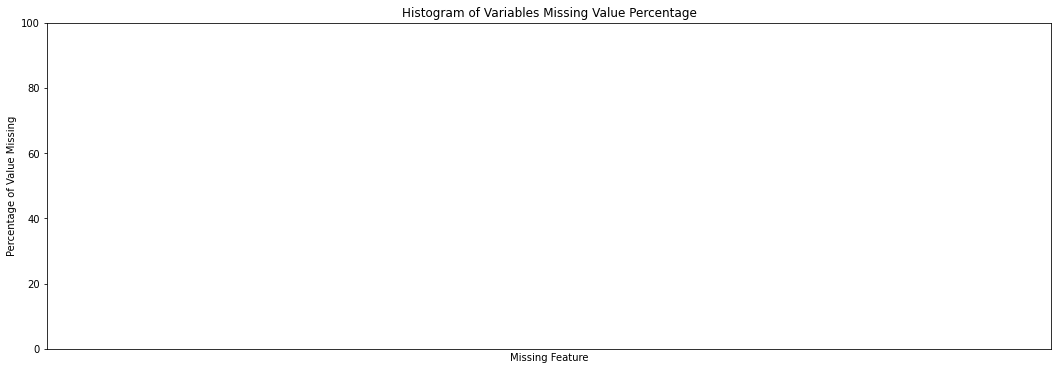

,index,Miss_Values,Miss_Rate,Available_Value


In [ ]:
tnv.Missing_Value_Analysis(df)

In [ ]:
print(f'Duplicates in this dataset frame: {df.iloc[:,1:].duplicated().sum()}, ({np.round(100*df.iloc[:,1:].duplicated().sum()/len(df),1)}%)')
print('')

Duplicates in this dataset frame: 20, (5.0%)



In [ ]:
# Varify the data type match with corresponding columns types
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:
# Check column name and categories
df.columns.values

array(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'],
      dtype=object)

Female    204
Male      196
Name: Gender, dtype: int64


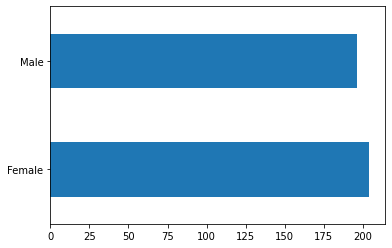

In [ ]:
Variable = 'Gender'
print(df[Variable].value_counts())
df[Variable].value_counts().plot(kind='barh')

In [ ]:
# Analyze the cardinality of features
# array(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'],dtype=object)
# Number of float type[constant, continous], categorical type[binary, non-binary]
# 2 binary categorical features: Gender
# 2 continuous features: Age, EstimatedSalary
# 1 possible drop features: User ID
# Target Variable: Purchased(Binary Categorical Features)
df.drop('User ID', axis=1, inplace=True)

In [ ]:
df.head(3)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0


In [ ]:
# X = df.iloc[:,1:-1] # X value contains all the variables except labels -only if the prediction column is last one
# y = df.iloc[:,-1] # these are the labels
X = df.drop('Purchased', axis=1)
y = df['Purchased']


In [ ]:
# Import library
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
categorical_feature = ['Gender']
gender_ohe = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  gender_ohe,
                                  categorical_feature)],
                                  remainder='passthrough')

In [ ]:
X_transformed = transformer.fit_transform(X)
pd.DataFrame(X_transformed).head()

,0,1,2,3
0,0.0,1.0,19.0,19000.0
1,0.0,1.0,35.0,20000.0
2,1.0,0.0,26.0,43000.0
3,1.0,0.0,27.0,57000.0
4,0.0,1.0,19.0,76000.0


In [ ]:
# from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X_transformed)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sc,y, test_size=0.2, random_state=66)
# we create the test train split first

In [ ]:
pd.DataFrame(X_train).to_csv('train_x.csv')
pd.DataFrame(X_test).to_csv('test_x.csv')
pd.DataFrame(y_train).to_csv('train_y.csv')
pd.DataFrame(y_test).to_csv('test_y.csv')

## Apply Logistic Regress Model

In [ ]:
# from sklearn.linear_model import LogisticRegression
lgr_model = LogisticRegression()
lgr_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.model_selection import cross_val_score
lgr_score = cross_val_score(lgr_model,X_train, y_train, scoring='accuracy')
print("训练集上的平均精准度：%0.2f（+/-%0.2f）" % (lgr_score.mean(),lgr_score.std()*2))

训练集上的平均精准度：0.84（+/-0.08）


In [ ]:
score = lgr_model.score(X_train, y_train)
score

0.853125

In [ ]:
y_pred = lgr_model.predict(X_test)

In [ ]:
# from sklearn.metrics import confusion_matrix
lgr_cm = confusion_matrix(y_test, y_pred)
print(lgr_cm)

[[47  5]
 [ 7 21]]


In [ ]:
lgr_as = accuracy_score(y_test, y_pred)
lgr_as

0.85

In [ ]:
y_test = y_test.to_numpy()
y_test

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1])

## Apply Support Vector Machine Model

In [ ]:
# from sklearn.svm import SVC
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
svc_model = SVC(kernel = 'linear', random_state = 0)
svc_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [ ]:
svc_model.score(X_test, y_test)

0.8375

In [ ]:
y_pred = svc_model.predict(X_test)
svc_cm = confusion_matrix(y_test, y_pred)
print(svc_cm)

[[48  4]
 [ 9 19]]


## Apply Decision Tree Model

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
dt_model = DecisionTreeClassifier(criterion='entropy')
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
dt_model.score(X_test, y_test)

0.875

In [ ]:
y_pred = dt_model.predict(X_test)
dt_cm = confusion_matrix(y_test, y_pred)
print(dt_cm)

[[46  6]
 [ 4 24]]


## Apply K Nearest Neighbors

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_model.score(X_test, y_test)

0.9375

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
knn_cm = confusion_matrix(y_test, y_pred)
print(knn_cm)

[[50  2]
 [ 3 25]]


In [ ]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
# from sklearn.model_selection import GridSearchCV
k_range = range(1,31)
print(k_range)
weight_factor = ('uniform','distance')
param_grid = dict(n_neighbors=k_range, weights=weight_factor)
param_grid


range(1, 31)


{'n_neighbors': range(1, 31), 'weights': ('uniform', 'distance')}

In [ ]:
knn_grid_model = GridSearchCV(knn_model, param_grid, cv=10, scoring='accuracy')

In [ ]:
knn_grid_model.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ('uniform', 'distance')},
             scoring='accuracy')

In [ ]:
knn_grid_model.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [ ]:
knn_grid_model.best_score_

0.90625

In [ ]:
df = pd.DataFrame(knn_grid_model.cv_results_)
df = df.sort_values(['rank_test_score','mean_fit_time'])
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
8,0.001256,0.000556,0.002230,0.000556,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.96875,0.90625,0.90625,0.90625,0.93750,0.90625,0.90625,0.84375,0.84375,0.93750,0.906250,0.036975,1
18,0.001531,0.000143,0.003130,0.000478,10,uniform,"{'n_neighbors': 10, 'weights': 'uniform'}",0.96875,0.87500,0.90625,0.90625,0.90625,0.87500,0.93750,0.87500,0.87500,0.93750,0.906250,0.031250,1
22,0.001533,0.000082,0.003007,0.000069,12,uniform,"{'n_neighbors': 12, 'weights': 'uniform'}",0.96875,0.87500,0.93750,0.90625,0.87500,0.87500,0.93750,0.87500,0.87500,0.93750,0.906250,0.034233,1
20,0.001562,0.000128,0.003029,0.000123,11,uniform,"{'n_neighbors': 11, 'weights': 'uniform'}",0.96875,0.87500,0.90625,0.90625,0.90625,0.87500,0.93750,0.87500,0.87500,0.93750,0.906250,0.031250,1
10,0.001358,0.000526,0.002433,0.000457,6,uniform,"{'n_neighbors': 6, 'weights': 'uniform'}",0.96875,0.90625,0.87500,0.93750,0.90625,0.87500,0.90625,0.84375,0.87500,0.93750,0.903125,0.035493,5
24,0.001496,0.000111,0.003103,0.000310,13,uniform,"{'n_neighbors': 13, 'weights': 'uniform'}",0.96875,0.87500,0.93750,0.90625,0.87500,0.87500,0.93750,0.84375,0.87500,0.93750,0.903125,0.038145,5
16,0.001737,0.000190,0.005708,0.003435,9,uniform,"{'n_neighbors': 9, 'weights': 'uniform'}",0.96875,0.87500,0.90625,0.90625,0.90625,0.87500,0.93750,0.87500,0.84375,0.93750,0.903125,0.035493,5
12,0.000915,0.000019,0.001824,0.000068,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.93750,0.90625,0.90625,0.90625,0.87500,0.87500,0.93750,0.87500,0.84375,0.93750,0.900000,0.030619,8
25,0.001434,0.000070,0.001701,0.000065,13,distance,"{'n_neighbors': 13, 'weights': 'distance'}",0.96875,0.90625,0.90625,0.90625,0.87500,0.87500,0.90625,0.87500,0.84375,0.93750,0.900000,0.033657,8
21,0.001446,0.000078,0.001739,0.000130,11,distance,"{'n_neighbors': 11, 'weights': 'distance'}",0.96875,0.90625,0.90625,0.90625,0.87500,0.87500,0.90625,0.87500,0.84375,0.93750,0.900000,0.033657,8
